In [63]:
import json
import pandas as pd
import numpy as np

baseData = json.load(open("processed_data/baseData.json","r"))

N0  = json.load(open("processed_data/N0.json","r"))

programs = pd.read_csv("Data/summerOly_programs.csv",encoding = "latin1")
programs2028 = pd.read_csv("Data/2028_LA_sport.csv")

YearA3  = json.load(open("processed_data/YearA3.json","r"))


In [64]:

programs_modified = programs.rename(columns=lambda x: x.replace('*', '') if '*' in x else x)
programs_modified = programs_modified[~programs_modified['Sport'].isin(['Skating', 'Ice Hockey','Total events',"Total disciplines","Total sports"])]
programs_modified_transposed = programs_modified.transpose()

programs_modified_transposed.columns = programs_modified_transposed.loc["Sport",:]
programs_modified_transposed = programs_modified_transposed.drop(["Sport","Discipline","Code","Sports Governing Body"])
programs_modified_transposed = programs_modified_transposed.apply(pd.to_numeric, errors='coerce').fillna(0)

programs_modified_transposed1 = programs_modified_transposed.loc[:, programs_modified_transposed.nunique() > 1]
programs_modified_transposed2 = programs_modified_transposed1.loc[programs_modified_transposed1.apply(lambda row: row.nunique() > 1, axis=1)]
# programs2028_modified = programs2028[~programs2028['Sport'].isin(['Skating', 'Ice Hockey','Total events',"Total disciplines","Total sports"])]
# programs2028_modified = programs2028_modified.apply(pd.to_numeric, errors='coerce').fillna(0)

print(programs_modified_transposed.head())

Sport  Aquatics  Aquatics  Aquatics  Aquatics  Aquatics  Archery  Athletics  \
1896        0.0       0.0       0.0       4.0       0.0      0.0       12.0   
1900        0.0       0.0       0.0       7.0       1.0      7.0       23.0   
1904        0.0       2.0       0.0       9.0       1.0      6.0       25.0   
1906        0.0       1.0       0.0       4.0       0.0      0.0       21.0   
1908        0.0       2.0       0.0       6.0       1.0      3.0       26.0   

Sport  Badminton  Baseball and Softball  Baseball and Softball  ...  \
1896         0.0                    0.0                    0.0  ...   
1900         0.0                    0.0                    0.0  ...   
1904         0.0                    0.0                    0.0  ...   
1906         0.0                    0.0                    0.0  ...   
1908         0.0                    0.0                    0.0  ...   

Sport  Taekwondo  Tennis  Triathlon  Tug of War  Volleyball  Volleyball  \
1896         0.0     2.

In [65]:
# 按列名对 DataFrame 进行分组并对每组的值求和
programs_modified_transposed3 = programs_modified_transposed2.groupby(programs_modified_transposed2.columns, axis=1).sum()

# # 打印合并后的 DataFrame
print(programs_modified_transposed3)


Sport  Aquatics  Archery  Athletics  Badminton  Baseball and Softball  \
1896        4.0      0.0       12.0        0.0                    0.0   
1900        8.0      7.0       23.0        0.0                    0.0   
1904       12.0      6.0       25.0        0.0                    0.0   
1906        5.0      0.0       21.0        0.0                    0.0   
1908        9.0      3.0       26.0        0.0                    0.0   
1912       14.0      0.0       30.0        0.0                    0.0   
1920       16.0     10.0       29.0        0.0                    0.0   
1924       17.0      0.0       27.0        0.0                    0.0   
1928       16.0      0.0       27.0        0.0                    0.0   
1932       16.0      0.0       29.0        0.0                    0.0   
1936       16.0      0.0       29.0        0.0                    0.0   
1948       16.0      0.0       33.0        0.0                    0.0   
1952       16.0      0.0       33.0        0.0     

C:\Users\PC\AppData\Local\Temp\ipykernel_49484\2898264147.py:2: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  programs_modified_transposed3 = programs_modified_transposed2.groupby(programs_modified_transposed2.columns, axis=1).sum()


In [66]:
from sklearn.preprocessing import MinMaxScaler
# 1. 对每一列做归一化处理
scaler = MinMaxScaler()
programs_normalized = scaler.fit_transform(programs_modified_transposed3)
# print(programs_normalized)
# 2. 将归一化后的数据转为 DataFrame
programs_normalized_df = pd.DataFrame(programs_normalized, columns=programs_modified_transposed3.columns)
print(programs_normalized_df)
# 3. 计算每一行的均值
row_means = programs_normalized_df.mean(axis=1)

# 4. 每个元素减去该行均值
normalized_adjusted = programs_normalized_df.sub(row_means, axis=0)

normalized_adjusted.index = programs_modified_transposed3.index
# 显示处理后的结果
# import ace_tools as tools
# tools.display_dataframe_to_user(name="Normalized and Adjusted DataFrame", dataframe=normalized_adjusted)

# 输出前几行查看结果
print(normalized_adjusted.head())
normalized_adjusted.to_csv("processed_data/normalized.csv")

Sport  Aquatics  Archery  Athletics  Badminton  Baseball and Softball  \
0      0.000000      0.0   0.000000        0.0                    0.0   
1      0.088889      0.7   0.305556        0.0                    0.0   
2      0.177778      0.6   0.361111        0.0                    0.0   
3      0.022222      0.0   0.250000        0.0                    0.0   
4      0.111111      0.3   0.388889        0.0                    0.0   
5      0.222222      0.0   0.500000        0.0                    0.0   
6      0.266667      1.0   0.472222        0.0                    0.0   
7      0.288889      0.0   0.416667        0.0                    0.0   
8      0.266667      0.0   0.416667        0.0                    0.0   
9      0.266667      0.0   0.472222        0.0                    0.0   
10     0.266667      0.0   0.472222        0.0                    0.0   
11     0.266667      0.0   0.583333        0.0                    0.0   
12     0.266667      0.0   0.583333        0.0     

In [67]:
YearAmedel = pd.read_csv("yearMedel.csv")
train_data = []
train_label = []
for row in YearAmedel.itertuples():
    train_data.append(list(normalized_adjusted.loc[str(row.Year)]))
    train_label.append(row.ratio)

print(train_data)
print(train_label)


[[-0.029163483575248283, -0.029163483575248283, -0.029163483575248283, -0.029163483575248283, -0.029163483575248283, -0.029163483575248283, -0.029163483575248283, -0.029163483575248283, -0.029163483575248283, -0.029163483575248283, -0.029163483575248283, -0.029163483575248283, 0.17083651642475176, -0.029163483575248283, -0.029163483575248283, -0.029163483575248283, -0.029163483575248283, -0.029163483575248283, 0.38260122230710464, -0.029163483575248283, -0.029163483575248283, -0.029163483575248283, -0.029163483575248283, -0.029163483575248283, -0.029163483575248283, -0.029163483575248283, -0.029163483575248283, -0.029163483575248283, -0.029163483575248283, -0.029163483575248283, -0.029163483575248283, 0.2089317545199898, -0.029163483575248283, -0.029163483575248283, -0.029163483575248283, -0.029163483575248283, -0.029163483575248283, 0.22083651642475172, -0.029163483575248283, -0.029163483575248283, -0.029163483575248283, -0.029163483575248283, 0.10416984975808505, 0.02083651642475172]

In [68]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.5)
model.fit(train_data,train_label)

c = dict(zip(normalized_adjusted.columns,model.coef_))
print(c)
max_key, max_value = max(c.items(), key=lambda x: x[1])

print(f"键: {max_key}, 值: {max_value}")
print(model.score(train_data, train_label))


{'Aquatics': np.float64(0.03629941896478694), 'Archery': np.float64(0.04927578846729963), 'Athletics': np.float64(0.03391082913494247), 'Badminton': np.float64(-0.0029985768355751787), 'Baseball\xa0and Softball': np.float64(0.014069141884256562), 'Basketball': np.float64(-0.03724552215337387), 'Basque Pelota': np.float64(-0.03407096392330167), 'Boxing': np.float64(0.07208727601415481), 'Breaking': np.float64(0.004919887883726066), 'Canoeing': np.float64(-0.04915666730421697), 'Cricket': np.float64(-0.03407096392330167), 'Croquet': np.float64(-0.03407096392330167), 'Cycling': np.float64(0.028588933201317022), 'Equestrian': np.float64(-0.018581202285949613), 'Fencing': np.float64(0.005514283321320295), 'Field hockey': np.float64(-0.06882402522074393), 'Football': np.float64(-0.03192090190972597), 'Golf': np.float64(0.08323746532537238), 'Gymnastics': np.float64(0.053531736095109084), 'Handball': np.float64(-0.035739962396200364), 'Jeu de Paume': np.float64(-0.05587919976639333), 'Judo': 

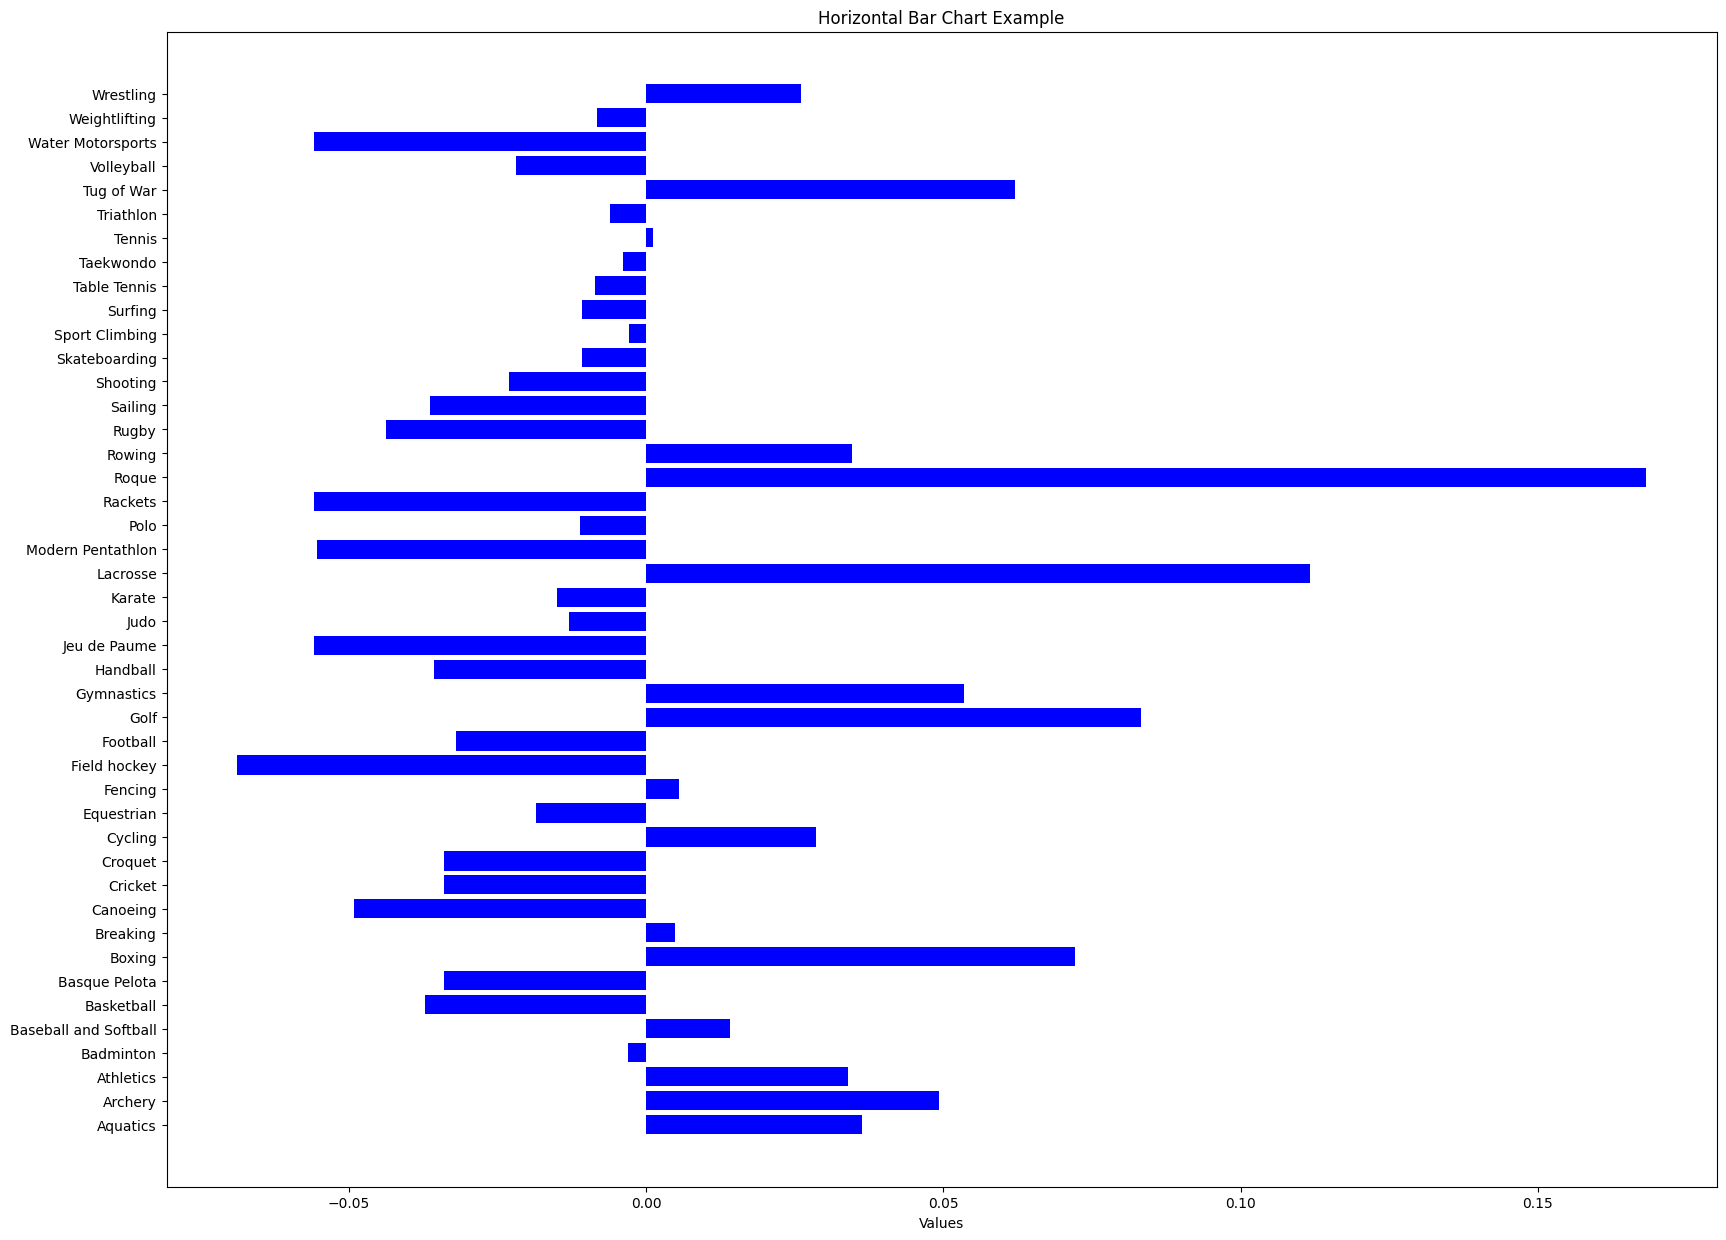

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
# Data
categories = ['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten']
values = [-0.3, -0.1, 0.4, -0.2, 0.5, 0.3, 0.6, 0.4, -0.2, -0.1]

categories = c.keys()
values  = c.values()
line_values = list(normalized_adjusted.loc[str(1904)])

# Create a horizontal bar chart
plt.barh(categories, values, color='blue')

# Add labels and title
plt.xlabel('Values')
plt.title('Horizontal Bar Chart Example')

# Show the plot
plt.show()


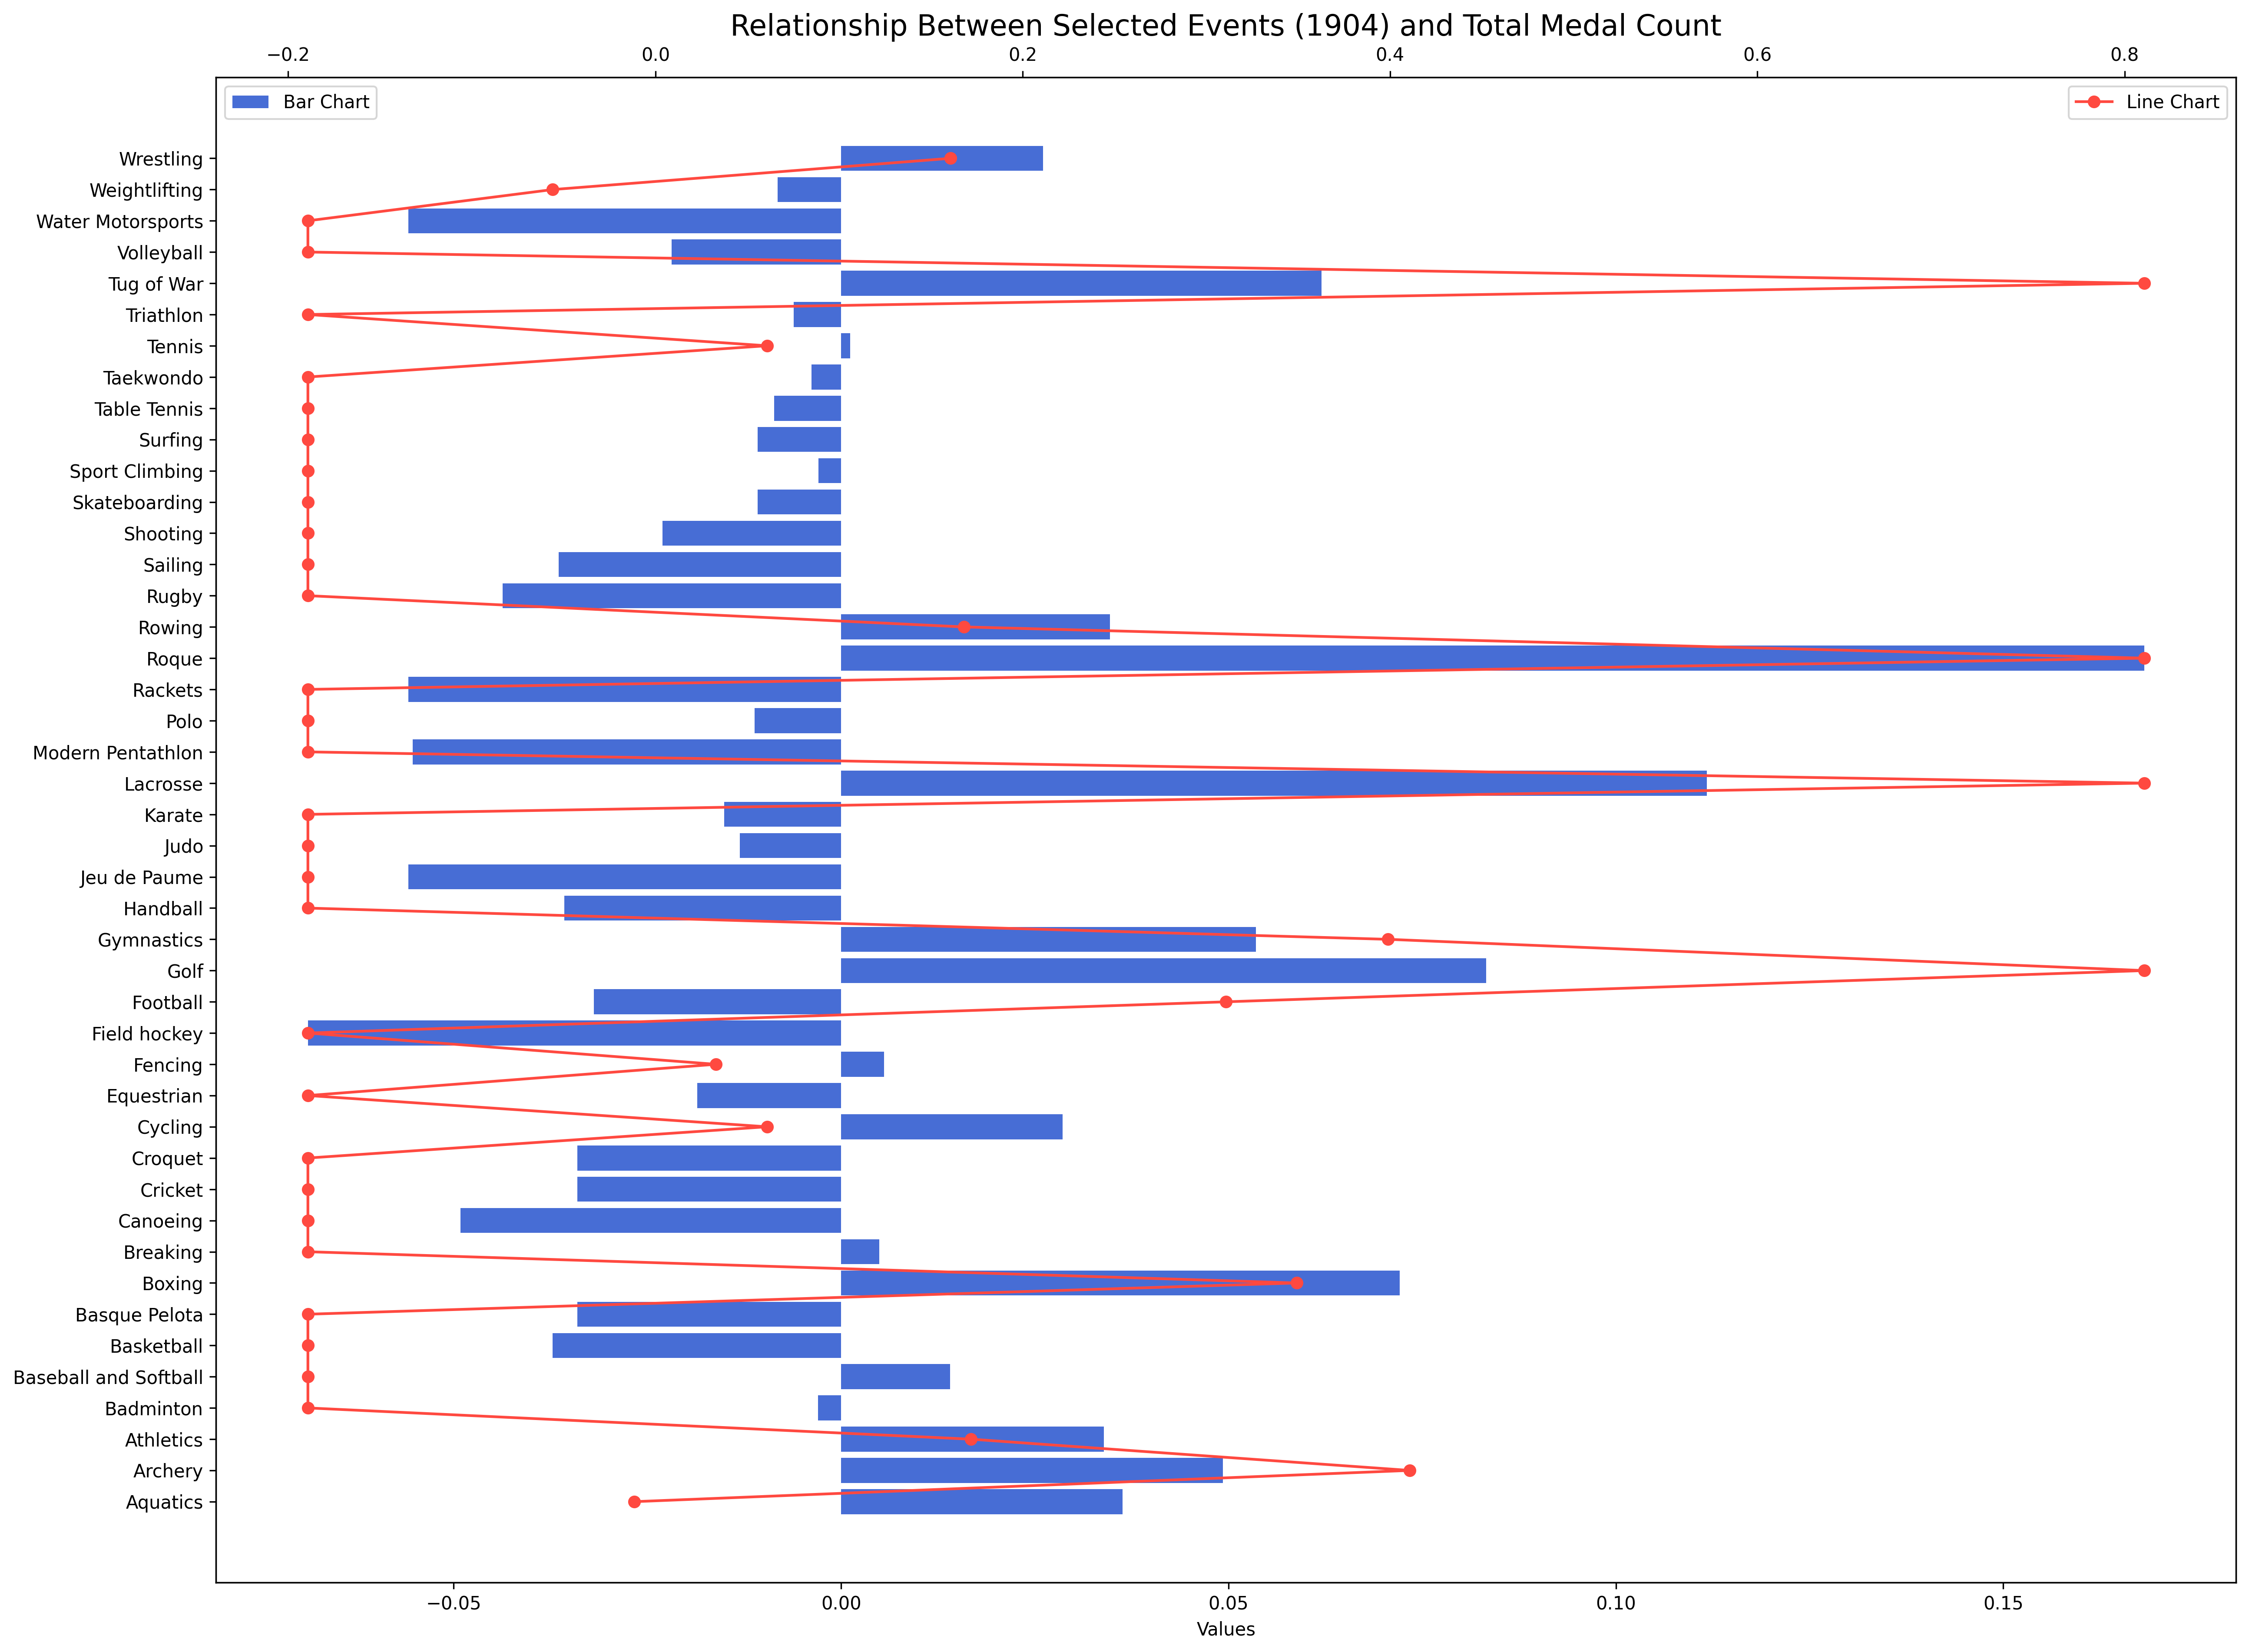

In [75]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(20,15), dpi=300)
# Data
categories = ['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten']
values = [-0.3, -0.1, 0.4, -0.2, 0.5, 0.3, 0.6, 0.4, -0.2, -0.1]
line_values = [0.1, 0.2, 0.5, 0.3, 0.4, 0.2, 0.6, 0.3, 0.1, 0.4]  # 这里是折线图的数据

categories = c.keys()
values  = c.values()
line_values1 = list(normalized_adjusted.loc[str(1904)])
line_values2 = list(normalized_adjusted.loc[str(1932)])
line_values3 = list(normalized_adjusted.loc[str(1984)])
line_values4 = list(normalized_adjusted.loc[str(1996)])
# 创建一个图形和坐标轴
fig, ax1 = plt.subplots(figsize = (20,15),dpi=300)

# 绘制水平条形图
ax1.barh(categories, values, color='#476DD5', label='Bar Chart')

# 创建第二个y轴
ax2 = ax1.twiny()  # 共享x轴

# 绘制折线图
ax2.plot(line_values1, categories, color='#ff4940', marker='o', label='Line Chart')
# ax2.plot(line_values2, categories, color='red', marker='o', label='Line Chart')
# ax2.plot(line_values3, categories, color='red', marker='o', label='Line Chart')
# ax2.plot(line_values4, categories, color='red', marker='o', label='Line Chart')
# 设置标签和标题
ax1.set_xlabel('Values')
ax1.set_title('Relationship Between Selected Events (1904) and Total Medal Count',fontsize = 16)

# 显示图例
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 显示图形
plt.show()


In [71]:

# print(programs_modified_transposed.isna().any().any())

# constant_columns = programs_modified_transposed.nunique() == 1  # 计算每列唯一值的数量，若为 1，则该列为常数列

# print("常数列:", programs_modified_transposed.columns[constant_columns].tolist())



# print(programs_modified_transposed)
# constant_rows = programs_modified_transposed.apply(lambda row: row.nunique() == 1, axis=1)

# print("常数行的索引:", programs_modified_transposed.index[constant_rows].tolist())

